In [1]:
import pandas as pd

In [2]:
import chardet

with open("../data/Frankenstein_Plan_Mengen_ZR.csv", "rb") as f:
    result = chardet.detect(f.read(100000))
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [85]:
import pandas as pd

# Schritt 1: CSV einlesen
df_raw = pd.read_csv(
    "../data/Frankenstein_Plan_Mengen_ZR.csv",
    encoding="ISO-8859-1",
    sep=";",
    header=None,
    skip_blank_lines=False,
    low_memory=False
)

# Schritt 2: Hole Zeitreihen-Namen (Zeile 10 -> index 9) & Spaltenüberschriften (Zeile 17 -> index 16)
reihe_names = df_raw.iloc[9].tolist()
reihe_names[0] = "von"
reihe_names[1] = "bis"
einheiten = df_raw.iloc[16].tolist()

# Schritt 3: Erstelle MultiIndex für die Spalten
multi_cols = pd.MultiIndex.from_arrays([einheiten, reihe_names])

# Schritt 4: Daten ab Zeile 18 (index 17)
df = df_raw.iloc[17:].copy()
df.columns = multi_cols
df.reset_index(drop=True, inplace=True)

# Schritt 5: MultiIndex zu sprechenden Spaltennamen zusammenführen
df.columns = [f"{unit} | {name}" for unit, name in df.columns]


von_raw = df['von  | von']
bis_raw = df['bis | bis']

# Schritt 6: Konvertiere alle "object"-Spalten mit deutschem Zahlenformat zu float
df = df.apply(lambda col: col.str.replace(" ", "").str.replace(",", ".") if col.dtype == "object" else col)
df = df.apply(pd.to_numeric, errors="ignore")

df

C:\Users\johan\AppData\Local\Temp\ipykernel_26804\944154045.py:36: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,von | von,bis | bis,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,...,MWh/h | CV_00349016.PLAN.Menge,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | CV_00348857.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1
0,01.01.201406:00,01.01.201407:00,51.476,1709.224,461.161,1025.914,45.360,28.190,57.864,121.684,...,NaN,NaN,NaN,0.753,34.045,NaN,19.550,1.079,7.284,1.900
1,01.01.201407:00,01.01.201408:00,51.026,1671.588,453.456,1022.869,42.560,28.224,57.765,117.911,...,NaN,NaN,NaN,0.607,35.279,NaN,18.923,0.955,6.890,1.562
2,01.01.201408:00,01.01.201409:00,50.688,1817.313,454.455,1027.474,64.546,27.976,60.100,120.903,...,NaN,NaN,NaN,0.573,32.063,NaN,18.832,0.865,6.396,1.664
3,01.01.201409:00,01.01.201410:00,50.857,1725.431,455.622,1022.988,72.453,28.134,60.483,120.126,...,NaN,NaN,NaN,0.495,28.629,NaN,18.636,0.865,6.890,1.619
4,01.01.201410:00,01.01.201411:00,50.873,1997.502,454.479,1024.464,69.048,27.853,60.366,120.459,...,NaN,NaN,NaN,0.562,28.563,NaN,18.158,0.787,8.497,1.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,01.01.202201:00,01.01.202202:00,0.000,862.281,25.255,258.222,31.612,33.446,37.185,164.931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70124,01.01.202202:00,01.01.202203:00,0.000,789.112,27.725,253.316,35.805,33.605,38.159,165.078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70125,01.01.202203:00,01.01.202204:00,0.000,791.423,28.767,245.283,33.190,33.616,39.938,155.266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70126,01.01.202204:00,01.01.202205:00,0.000,834.285,30.138,243.504,32.739,33.401,39.859,151.845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.dtypes.value_counts()

float64    322
object       2
Name: count, dtype: int64

In [87]:
df.shape

(70128, 324)

In [88]:
df.describe()

,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,MWh/h | FL_00352205.PLAN.MengeKW,MWh/h | FL_00352205.PLAN.MengeGA,...,MWh/h | CV_00349016.PLAN.Menge,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | CV_00348857.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1
count,70128.000000,64562.000000,64562.000000,7.012800e+04,6.530300e+04,64562.000000,64562.000000,64562.000000,64562.000000,64562.000000,...,17544.000000,17544.000000,17544.000000,35058.000000,35058.000000,0.0,40151.000000,40151.000000,40151.000000,40151.000000
mean,40.687330,1001.081020,1166.054753,2.115617e+05,2.284481e+04,32.983156,108.435133,275.696397,283.848703,164.460590,...,0.000054,0.000857,5.585563,0.283348,11.422084,NaN,15.804453,0.277371,4.204395,0.584675
std,19.955772,751.145042,1090.920945,7.558827e+06,8.007311e+05,18.924337,35.970975,58.886632,594.850660,99.503903,...,0.000226,0.001395,3.959079,0.249413,16.120804,NaN,13.231091,0.359915,4.002556,0.624758
min,0.000000,-649.969000,0.000000,2.000000e-03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,48.686000,342.582750,15.804500,2.583768e+02,3.304000e+01,27.038000,84.856750,236.828250,0.000000,100.468500,...,0.000000,0.000000,2.601000,0.057000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,49.890000,785.787000,793.840000,3.268535e+02,3.821100e+01,29.900000,111.565000,276.802000,1.622500,136.339500,...,0.000000,0.000000,5.311000,0.214000,0.000000,NaN,18.009000,0.045000,4.080000,0.430000
75%,51.291000,1560.870500,1989.842750,4.288252e+02,4.552300e+01,33.076500,132.436000,320.305250,185.145750,219.277000,...,0.000000,0.001000,8.023000,0.464000,21.228500,NaN,26.642000,0.563000,6.878500,0.984000
max,72.259000,4024.196000,3880.072000,3.260221e+08,4.622954e+07,189.597000,291.033000,445.881000,3965.712000,712.232000,...,0.001000,0.006000,20.340000,2.260000,75.155000,NaN,49.791000,1.651000,20.818000,4.024000


In [89]:
von = df[("von  | von")]
bis = df["bis | bis"]

In [90]:
von = pd.to_datetime(von_raw, dayfirst=True, errors="coerce")
bis = pd.to_datetime(bis_raw, dayfirst=True, errors="coerce")

In [91]:
df.index = von

In [92]:
df = df.drop(columns=[("von  | von"), ("bis | bis")])

In [93]:
df

,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,MWh/h | FL_00352205.PLAN.MengeKW,MWh/h | FL_00352205.PLAN.MengeGA,...,MWh/h | CV_00349016.PLAN.Menge,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | CV_00348857.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1
von | von,,,,,,,,,,,,,,,,,,,,,
2014-01-01 06:00:00,51.476,1709.224,461.161,1025.914,45.360,28.190,57.864,121.684,0.000,72.563,...,NaN,NaN,NaN,0.753,34.045,NaN,19.550,1.079,7.284,1.900
2014-01-01 07:00:00,51.026,1671.588,453.456,1022.869,42.560,28.224,57.765,117.911,0.000,76.735,...,NaN,NaN,NaN,0.607,35.279,NaN,18.923,0.955,6.890,1.562
2014-01-01 08:00:00,50.688,1817.313,454.455,1027.474,64.546,27.976,60.100,120.903,0.000,67.399,...,NaN,NaN,NaN,0.573,32.063,NaN,18.832,0.865,6.396,1.664
2014-01-01 09:00:00,50.857,1725.431,455.622,1022.988,72.453,28.134,60.483,120.126,0.000,65.328,...,NaN,NaN,NaN,0.495,28.629,NaN,18.636,0.865,6.890,1.619
2014-01-01 10:00:00,50.873,1997.502,454.479,1024.464,69.048,27.853,60.366,120.459,0.000,59.546,...,NaN,NaN,NaN,0.562,28.563,NaN,18.158,0.787,8.497,1.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 01:00:00,0.000,862.281,25.255,258.222,31.612,33.446,37.185,164.931,6.775,216.890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,0.000,789.112,27.725,253.316,35.805,33.605,38.159,165.078,8.112,196.111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,0.000,791.423,28.767,245.283,33.190,33.616,39.938,155.266,6.050,188.599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.index

DatetimeIndex(['2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               ...
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00',
               '2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00'],
              dtype='datetime64[ns]', name='von  | von', length=70128, freq=None)

In [95]:
df.index.to_series().diff().value_counts()

von  | von
0 days 01:00:00    70111
0 days 02:00:00        8
0 days 00:00:00        8
Name: count, dtype: int64

Duplikate im Index anzeigen

In [96]:
df.index[df.index.duplicated()]

DatetimeIndex(['2014-10-26 02:00:00', '2015-10-25 02:00:00',
               '2016-10-30 02:00:00', '2017-10-29 02:00:00',
               '2018-10-28 02:00:00', '2019-10-27 02:00:00',
               '2020-10-25 02:00:00', '2021-10-31 02:00:00'],
              dtype='datetime64[ns]', name='von  | von', freq=None)

Duplikate scheinen ein restprodukt der Winterzeit umstellung gewesen zu sein.

In [97]:
df[df.index.duplicated(keep=False)]

,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,MWh/h | FL_00352205.PLAN.MengeKW,MWh/h | FL_00352205.PLAN.MengeGA,...,MWh/h | CV_00349016.PLAN.Menge,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | CV_00348857.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1
von | von,,,,,,,,,,,,,,,,,,,,,
2014-10-26 02:00:00,51.919,745.368,937.259,562.846,37.856,18.482,53.818,176.234,0.000,3.108,...,NaN,NaN,NaN,0.157,19.690,NaN,11.958,0.180,2.731,0.618
2014-10-26 02:00:00,50.768,647.626,931.545,567.545,34.272,18.602,55.460,221.619,0.000,5.204,...,NaN,NaN,NaN,0.180,19.536,NaN,12.390,0.180,2.810,0.618
2015-10-25 02:00:00,51.383,742.739,1003.261,212.694,54.163,34.094,110.600,134.857,0.000,117.284,...,NaN,NaN,NaN,0.214,24.449,NaN,15.852,0.439,4.682,0.518
2015-10-25 02:00:00,51.399,773.660,1005.550,220.585,0.000,38.911,155.892,179.547,0.000,100.392,...,NaN,NaN,NaN,0.236,24.397,NaN,15.695,0.484,5.368,0.563
2016-10-30 02:00:00,49.796,662.566,1327.129,444.539,31.825,27.400,101.767,188.145,1260.126,154.956,...,0.0,0.0,6.899,0.204,0.000,NaN,12.596,0.317,2.675,0.317
2016-10-30 02:00:00,50.452,614.927,1325.622,452.114,0.000,27.400,122.125,188.145,1260.126,154.956,...,0.0,0.0,7.125,0.192,0.000,NaN,11.129,0.260,2.617,0.283
2017-10-29 02:00:00,49.262,649.598,637.437,347.038,36.662,83.428,97.001,274.095,1.263,275.210,...,0.0,0.0,14.690,0.181,1.440,NaN,0.000,0.000,0.000,0.000
2017-10-29 02:00:00,48.709,727.727,638.804,370.053,0.000,73.546,85.195,264.227,0.669,277.311,...,0.0,0.0,9.718,0.203,1.440,NaN,0.000,0.000,0.000,0.000
2018-10-28 02:00:00,47.438,NaN,NaN,0.388,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
for ts in df.index[df.index.duplicated(keep=False)].unique():
    print(f"\nZeitstempel: {ts}")
    print(df.loc[ts])


Zeitstempel: 2014-10-26 02:00:00
                     MWh/h | FL_00024360.PLAN.MengeHH.2  \
von  | von                                                
2014-10-26 02:00:00                              51.919   
2014-10-26 02:00:00                              50.768   

                     MWh/h | FL_00024360.PLAN.MengeHH.1  \
von  | von                                                
2014-10-26 02:00:00                             745.368   
2014-10-26 02:00:00                             647.626   

                     MWh/h | FL_00024360.PLAN.MengeKW  \
von  | von                                              
2014-10-26 02:00:00                           937.259   
2014-10-26 02:00:00                           931.545   

                     MWh/h | FL_00024360.PLAN.MengeGA  \
von  | von                                              
2014-10-26 02:00:00                           562.846   
2014-10-26 02:00:00                           567.545   

                     MWh/h | FL_00

In [99]:
# Schritt 1: Kopiere das Original-DataFrame
df_adj = df.copy()

# Schritt 2: Finde doppelte Zeitstempel (Winterzeit-Umschaltung)
is_duplicate = df_adj.index.duplicated(keep=False)

# Schritt 3: Erzeuge ein Marker-Array für die doppelten Einträge
# Wir brauchen das cumsum() % 2, um nur den zweiten Eintrag zu verschieben
duplicate_counter = (is_duplicate.cumsum() % 2 == 1)

# Schritt 4: Verschiebe den zweiten Eintrag um 1 Minute
df_adj.index = df_adj.index.where(~(is_duplicate & duplicate_counter), df_adj.index + pd.Timedelta(minutes=1))

# Schritt 5: Kennzeichne diese Fälle (optional)
df_adj["winterzeit"] = 0
df_adj.loc[duplicate_counter, "winterzeit"] = 1


In [101]:
# Sortieren Sie den DataFrame nach dem Index
df_adj = df_adj.sort_index()

# Jetzt können Sie den Zeitbereich abfragen
df_adj.loc["2014-10-26 02:00":"2014-10-26 02:02"]


,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,MWh/h | FL_00352205.PLAN.MengeKW,MWh/h | FL_00352205.PLAN.MengeGA,...,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | CV_00348857.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1,winterzeit
von | von,,,,,,,,,,,,,,,,,,,,,
2014-10-26 02:00:00,50.768,647.626,931.545,567.545,34.272,18.602,55.460,221.619,0.0,5.204,...,NaN,NaN,0.180,19.536,NaN,12.390,0.18,2.810,0.618,0
2014-10-26 02:01:00,51.919,745.368,937.259,562.846,37.856,18.482,53.818,176.234,0.0,3.108,...,NaN,NaN,0.157,19.690,NaN,11.958,0.18,2.731,0.618,1


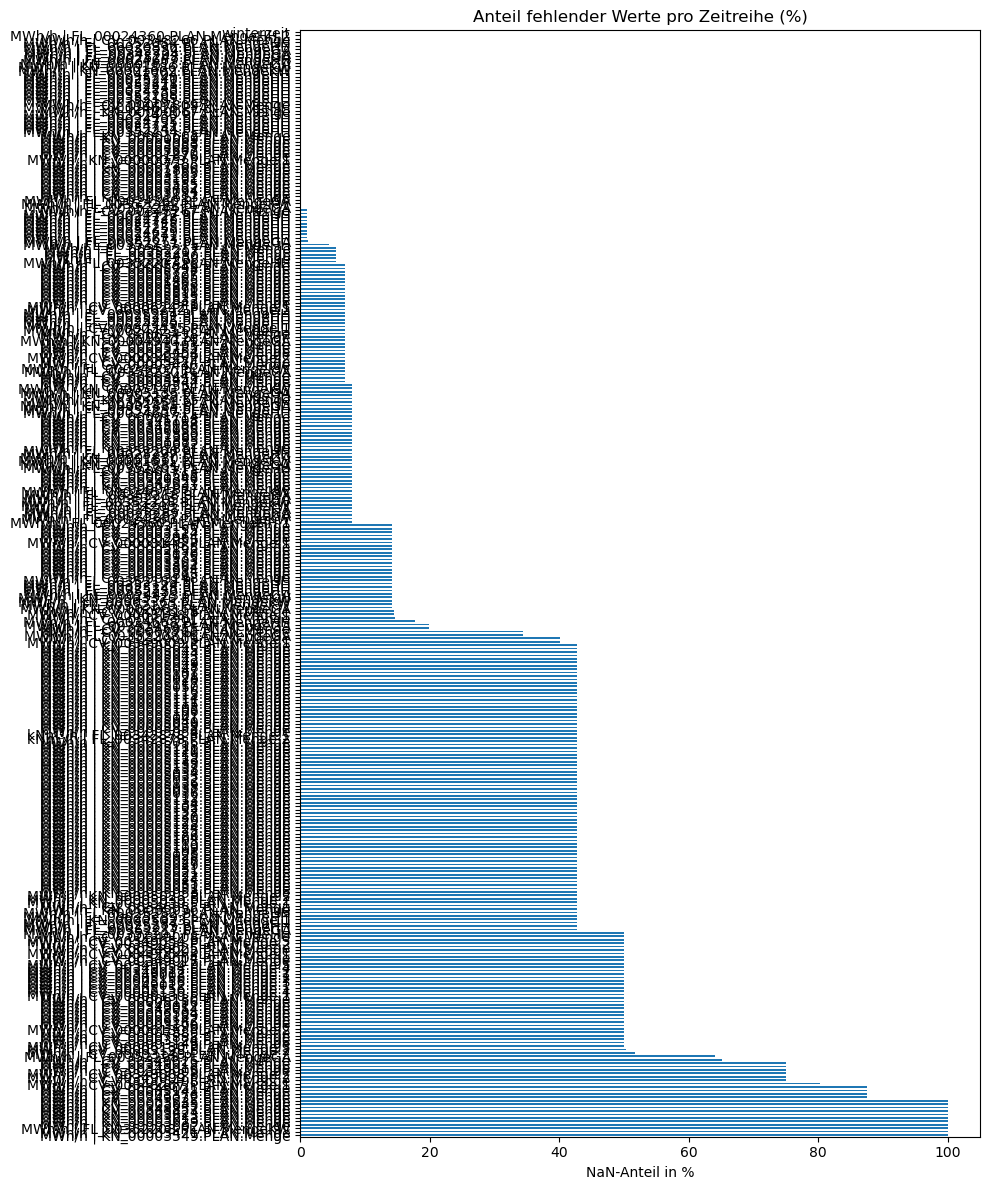

In [102]:
import matplotlib.pyplot as plt

# Anteil fehlender Werte pro Zeitreihe
(df_adj.isna().mean() * 100).sort_values(ascending=False).plot(
    kind="barh",
    figsize=(10, 12),
    title="Anteil fehlender Werte pro Zeitreihe (%)"
)
plt.xlabel("NaN-Anteil in %")
plt.tight_layout()
plt.show()

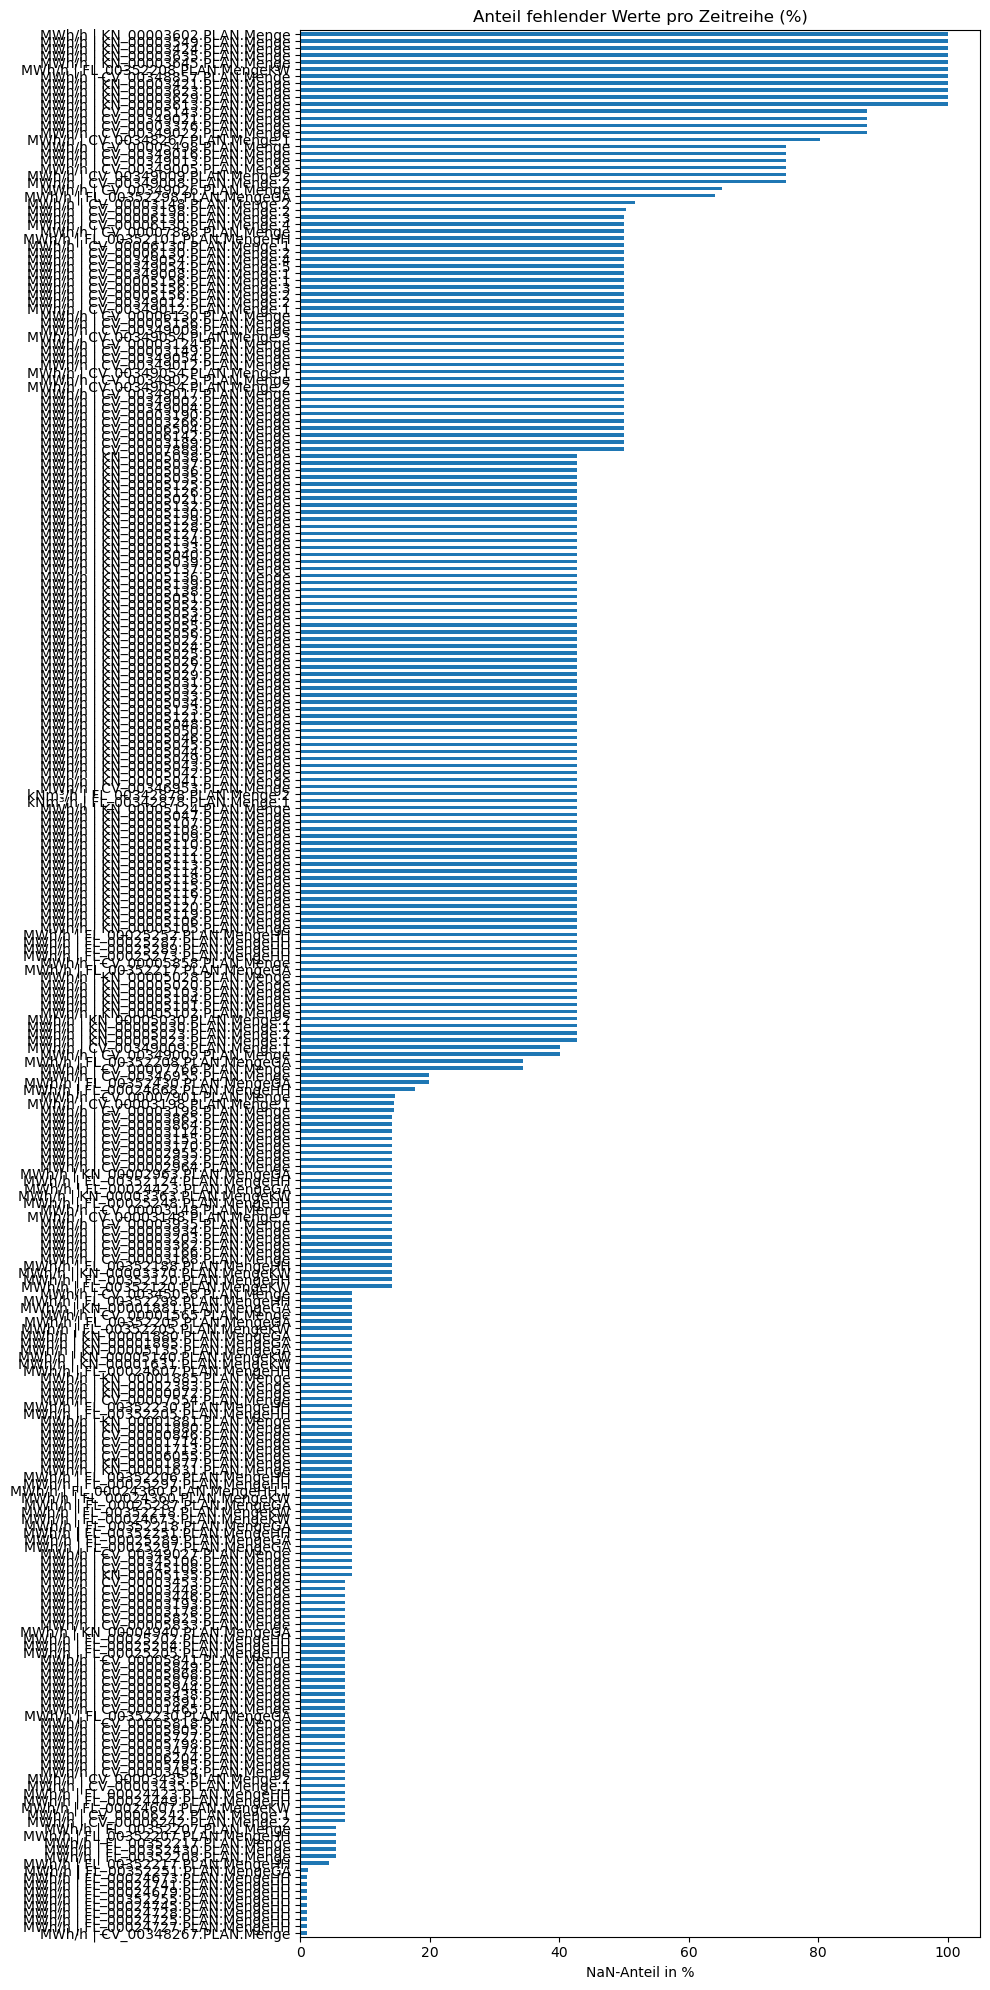

In [103]:
na_share = df_adj.isna().mean() * 100
na_share_filtered = na_share[na_share > 0].sort_values()

na_share_filtered.plot(
    kind="barh",
    figsize=(10, min(0.3 * len(na_share_filtered), 20)),  # dynamisch skalieren
    title="Anteil fehlender Werte pro Zeitreihe (%)"
)
plt.xlabel("NaN-Anteil in %")
plt.tight_layout()
plt.show()

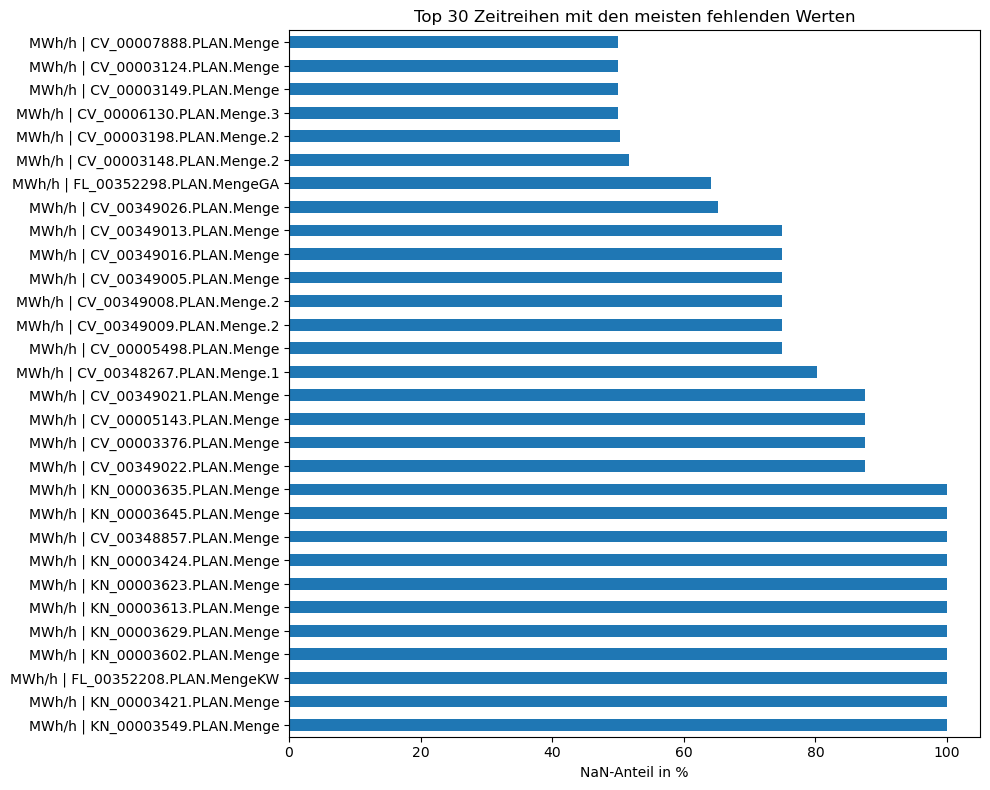

In [104]:
top_missing = na_share.sort_values(ascending=False).head(30)

top_missing.plot(
    kind="barh",
    figsize=(10, 8),
    title="Top 30 Zeitreihen mit den meisten fehlenden Werten"
)
plt.xlabel("NaN-Anteil in %")
plt.tight_layout()
plt.show()

In [105]:
df.isna().sum()           # Anzahl fehlender Werte pro Spalte


MWh/h | FL_00024360.PLAN.MengeHH.2        0
MWh/h | FL_00024360.PLAN.MengeHH.1     5566
MWh/h | FL_00024360.PLAN.MengeKW       5566
MWh/h | FL_00024360.PLAN.MengeGA          0
MWh/h | FL_00352230.PLAN.MengeGA       4825
                                      ...  
MWh/h | CV_00348857.PLAN.Menge        70128
MWh/h | KN_00005030.PLAN.Menge.2      29977
MWh/h | KN_00005030.PLAN.Menge.1      29977
MWh/h | KN_00005023.PLAN.Menge.2      29977
MWh/h | KN_00005023.PLAN.Menge.1      29977
Length: 322, dtype: int64

In [106]:
df.isna().mean()

MWh/h | FL_00024360.PLAN.MengeHH.2    0.000000
MWh/h | FL_00024360.PLAN.MengeHH.1    0.079369
MWh/h | FL_00024360.PLAN.MengeKW      0.079369
MWh/h | FL_00024360.PLAN.MengeGA      0.000000
MWh/h | FL_00352230.PLAN.MengeGA      0.068803
                                        ...   
MWh/h | CV_00348857.PLAN.Menge        1.000000
MWh/h | KN_00005030.PLAN.Menge.2      0.427461
MWh/h | KN_00005030.PLAN.Menge.1      0.427461
MWh/h | KN_00005023.PLAN.Menge.2      0.427461
MWh/h | KN_00005023.PLAN.Menge.1      0.427461
Length: 322, dtype: float64

In [81]:
df.describe()

,MWh/h | FL_00024360.PLAN.MengeHH.2,MWh/h | FL_00024360.PLAN.MengeHH.1,MWh/h | FL_00024360.PLAN.MengeKW,MWh/h | FL_00024360.PLAN.MengeGA,MWh/h | FL_00352230.PLAN.MengeGA,MWh/h | FL_00025289.PLAN.MengeGA,MWh/h | FL_00025287.PLAN.MengeGA,MWh/h | FL_00025297.PLAN.MengeGA,MWh/h | FL_00352205.PLAN.MengeKW,MWh/h | FL_00352205.PLAN.MengeGA,...,MWh/h | CV_00349017.PLAN.Menge,MWh/h | CV_00349016.PLAN.Menge,MWh/h | CV_00349013.PLAN.Menge,MWh/h | CV_00349005.PLAN.Menge,MWh/h | CV_00349004.PLAN.Menge,MWh/h | CV_00349002.PLAN.Menge,MWh/h | KN_00005030.PLAN.Menge.2,MWh/h | KN_00005030.PLAN.Menge.1,MWh/h | KN_00005023.PLAN.Menge.2,MWh/h | KN_00005023.PLAN.Menge.1
count,70128.000000,64562.000000,64562.000000,7.012800e+04,6.530300e+04,64562.000000,64562.000000,64562.000000,64562.000000,64562.000000,...,35058.000000,17544.000000,17544.000000,17544.000000,35058.000000,35058.000000,40151.000000,40151.000000,40151.000000,40151.000000
mean,40.687330,1001.081020,1166.054753,2.115617e+05,2.284481e+04,32.983156,108.435133,275.696397,283.848703,164.460590,...,59.693939,0.000054,0.000857,5.585563,0.283348,11.422084,15.804453,0.277371,4.204395,0.584675
std,19.955772,751.145042,1090.920945,7.558827e+06,8.007311e+05,18.924337,35.970975,58.886632,594.850660,99.503903,...,12.584763,0.000226,0.001395,3.959079,0.249413,16.120804,13.231091,0.359915,4.002556,0.624758
min,0.000000,-649.969000,0.000000,2.000000e-03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.686000,342.582750,15.804500,2.583768e+02,3.304000e+01,27.038000,84.856750,236.828250,0.000000,100.468500,...,52.590000,0.000000,0.000000,2.601000,0.057000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.890000,785.787000,793.840000,3.268535e+02,3.821100e+01,29.900000,111.565000,276.802000,1.622500,136.339500,...,60.147000,0.000000,0.000000,5.311000,0.214000,0.000000,18.009000,0.045000,4.080000,0.430000
75%,51.291000,1560.870500,1989.842750,4.288252e+02,4.552300e+01,33.076500,132.436000,320.305250,185.145750,219.277000,...,67.211000,0.000000,0.001000,8.023000,0.464000,21.228500,26.642000,0.563000,6.878500,0.984000
max,72.259000,4024.196000,3880.072000,3.260221e+08,4.622954e+07,189.597000,291.033000,445.881000,3965.712000,712.232000,...,92.887000,0.001000,0.006000,20.340000,2.260000,75.155000,49.791000,1.651000,20.818000,4.024000


In [82]:
df.columns

Index(['MWh/h | FL_00024360.PLAN.MengeHH.2',
       'MWh/h | FL_00024360.PLAN.MengeHH.1',
       'MWh/h | FL_00024360.PLAN.MengeKW', 'MWh/h | FL_00024360.PLAN.MengeGA',
       'MWh/h | FL_00352230.PLAN.MengeGA', 'MWh/h | FL_00025289.PLAN.MengeGA',
       'MWh/h | FL_00025287.PLAN.MengeGA', 'MWh/h | FL_00025297.PLAN.MengeGA',
       'MWh/h | FL_00352205.PLAN.MengeKW', 'MWh/h | FL_00352205.PLAN.MengeGA',
       ...
       'MWh/h | CV_00349017.PLAN.Menge', 'MWh/h | CV_00349016.PLAN.Menge',
       'MWh/h | CV_00349013.PLAN.Menge', 'MWh/h | CV_00349005.PLAN.Menge',
       'MWh/h | CV_00349004.PLAN.Menge', 'MWh/h | CV_00349002.PLAN.Menge',
       'MWh/h | KN_00005030.PLAN.Menge.2', 'MWh/h | KN_00005030.PLAN.Menge.1',
       'MWh/h | KN_00005023.PLAN.Menge.2', 'MWh/h | KN_00005023.PLAN.Menge.1'],
      dtype='object', length=311)

In [83]:
df.index

DatetimeIndex(['2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               ...
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00',
               '2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00'],
              dtype='datetime64[ns]', name='von  | von', length=70128, freq=None)

MWh/h | FL_00352208.PLAN.MengeKW    70128
MWh/h | KN_00003645.PLAN.Menge      70128
MWh/h | KN_00003602.PLAN.Menge      70128
MWh/h | KN_00003613.PLAN.Menge      70128
MWh/h | KN_00003623.PLAN.Menge      70128
MWh/h | KN_00003629.PLAN.Menge      70128
MWh/h | KN_00003635.PLAN.Menge      70128
MWh/h | KN_00003424.PLAN.Menge      70128
MWh/h | KN_00003421.PLAN.Menge      70128
MWh/h | KN_00003549.PLAN.Menge      70128
dtype: int64
MWh/h | FL_00352208.PLAN.MengeKW    100.0
MWh/h | KN_00003645.PLAN.Menge      100.0
MWh/h | KN_00003602.PLAN.Menge      100.0
MWh/h | KN_00003613.PLAN.Menge      100.0
MWh/h | KN_00003623.PLAN.Menge      100.0
MWh/h | KN_00003629.PLAN.Menge      100.0
MWh/h | KN_00003635.PLAN.Menge      100.0
MWh/h | KN_00003424.PLAN.Menge      100.0
MWh/h | KN_00003421.PLAN.Menge      100.0
MWh/h | KN_00003549.PLAN.Menge      100.0
dtype: float64


<Axes: title={'center': 'Anzahl fehlender Serien pro Stunde'}, xlabel='von  | von'>

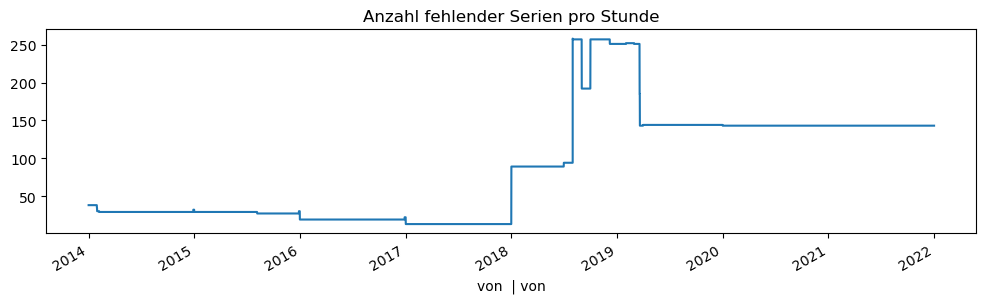

In [107]:
# Anzahl fehlender Werte pro Serie
missing_per_series = df.isna().sum().sort_values(ascending=False)
print(missing_per_series.head(10))

# Anteil fehlender Werte
missing_frac = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_frac.head(10))

# Zeitlicher Verlauf aller Missing Entries
missing_over_time = df.isna().sum(axis=1)
missing_over_time.plot(figsize=(12,3), title="Anzahl fehlender Serien pro Stunde")

Text(0.5, 1.0, 'Missingness Heatmap (stichprobenartig)')

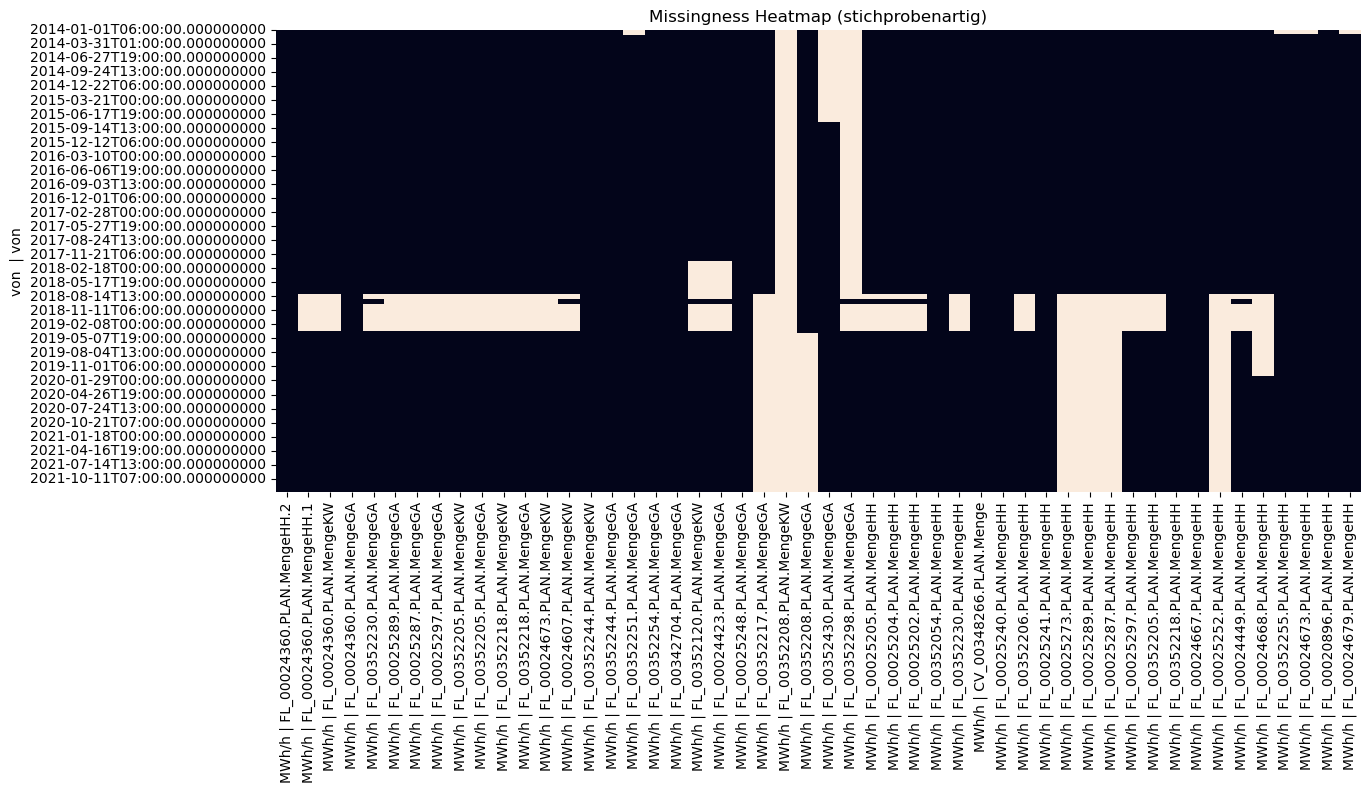

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Für Performance: Limit auf z. B. 2000 Zeitpunkte und 50 Serien
sample = df.iloc[::10, :50]
plt.figure(figsize=(14,6))
sns.heatmap(sample.isna(), cbar=False)
plt.title("Missingness Heatmap (stichprobenartig)")

count      360.000000
mean     16975.277778
std      16508.758695
min          1.000000
25%       4081.000000
50%       5837.000000
75%      29977.000000
max      70128.000000
Name: gap_hours, dtype: float64


<Axes: >

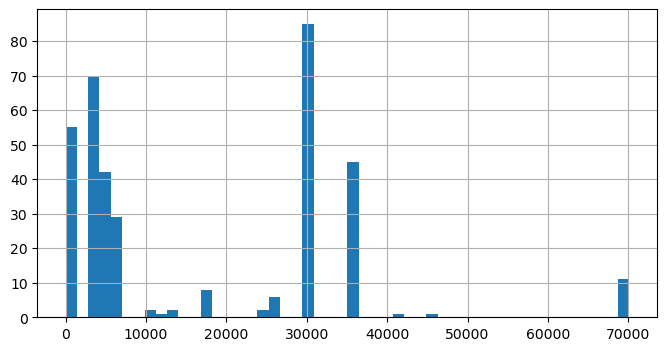

In [109]:
# Funktion: Länge der Sequenzen zusammenhängender NaNs in jeder Spalte
def gap_lengths(s):
    return s.isna().astype(int).groupby(s.notna().astype(int).cumsum()).sum()

all_gaps = []
for col in df:
    lengths = gap_lengths(df[col])
    all_gaps += list(lengths[lengths>0])

# als DataFrame
gap_df = pd.Series(all_gaps, name="gap_hours")
print(gap_df.describe())
gap_df.hist(bins=50, figsize=(8,4))

In [111]:
# für jede Spalte den ersten Zeit­stempel suchen, an dem kein NaN mehr steht
first_valid = df.apply(lambda col: col.first_valid_index())

# in eine Series umwandeln (Index=Spaltenname, Wert=Timestamp)
first_valid.name = "start"


<Axes: title={'center': 'Anlagen‑Starts pro Monat'}, xlabel='start'>

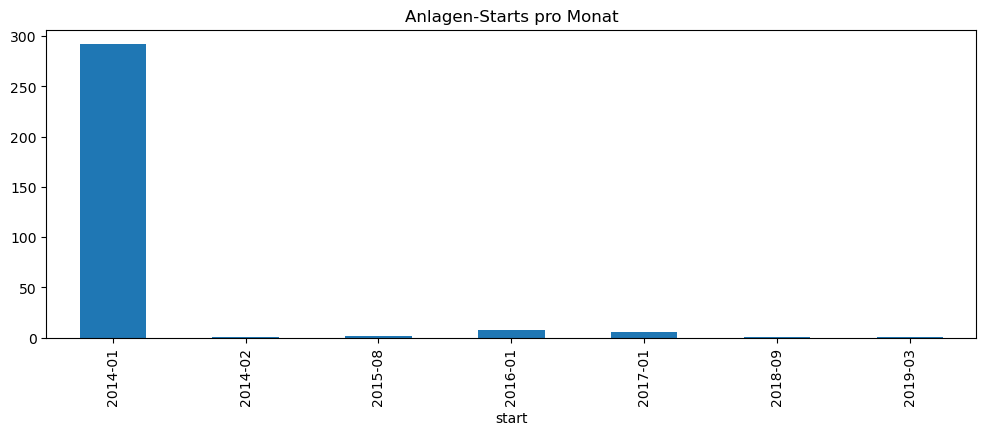

In [112]:
# auf Monatsbasis zählen, wie viele Serien im jeweiligen Monat starten
starts_per_month = (first_valid
                    .dt.to_period('M')
                    .value_counts()
                    .sort_index())

# als Balkendiagramm visualisieren
starts_per_month.plot(kind='bar', figsize=(12,4),
                      title="Anlagen‑Starts pro Monat")

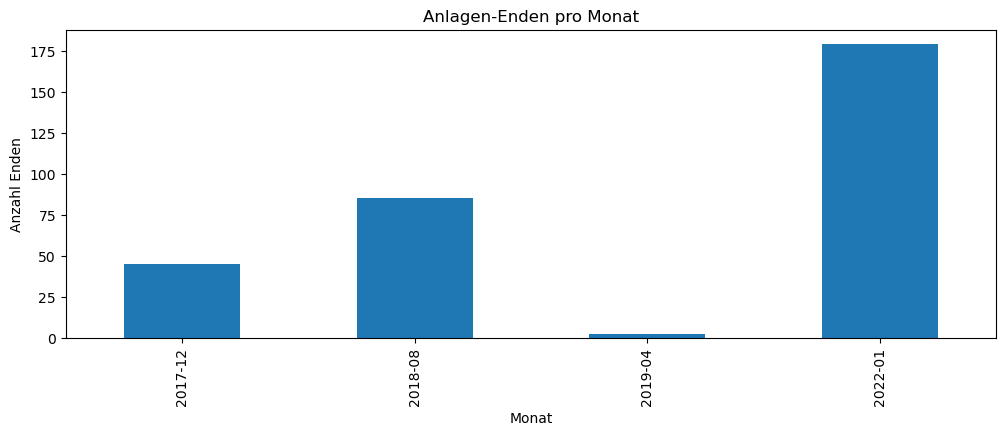

In [114]:

# 1. Letzten validen Zeitstempel pro Serie finden
last_valid = df.apply(lambda col: col.last_valid_index())
last_valid.name = "end"

# 2. Auf Monatsebene aggregieren
ends_per_month = (last_valid
                  .dt.to_period("M")
                  .value_counts()
                  .sort_index())

# 3. Plotten
ends_per_month.plot(kind="bar", figsize=(12,4),
                    title="Anlagen‑Enden pro Monat",
                    xlabel="Monat",
                    ylabel="Anzahl Enden")
plt.show()

In [116]:
# 1. Letzten validen Zeitstempel pro Serie ermitteln
last_valid = df.apply(lambda col: col.last_valid_index())
last_valid.name = "end"

# 2. Auf Monatsperiode umwandeln
end_month = last_valid.dt.to_period("M")

# 3. Problem‑Monate definieren
bad_months = pd.PeriodIndex(["2017-12", "2018-08"], freq="M")

# 4. Serien auswählen, deren Endmonat nicht in bad_months liegt
good_series = end_month[~end_month.isin(bad_months)].index

# 5. Gefiltertes DataFrame erzeugen
df_filtered = df[good_series]

print(f"Ursprünglich: {df.shape[1]} Serien  →  nach Filter: {df_filtered.shape[1]} Serien übrig")

Ursprünglich: 322 Serien  →  nach Filter: 192 Serien übrig


In [117]:
df_filtered.isna().mean().sort_values(ascending=False).head(10)

MWh/h | FL_00352208.PLAN.MengeKW    1.0
MWh/h | KN_00003629.PLAN.Menge      1.0
MWh/h | KN_00003635.PLAN.Menge      1.0
MWh/h | KN_00003645.PLAN.Menge      1.0
MWh/h | KN_00003613.PLAN.Menge      1.0
MWh/h | KN_00003602.PLAN.Menge      1.0
MWh/h | KN_00003549.PLAN.Menge      1.0
MWh/h | KN_00003424.PLAN.Menge      1.0
MWh/h | KN_00003623.PLAN.Menge      1.0
MWh/h | CV_00348857.PLAN.Menge      1.0
dtype: float64

<Axes: title={'center': 'Anzahl fehlender Serien pro Stunde'}, xlabel='von  | von'>

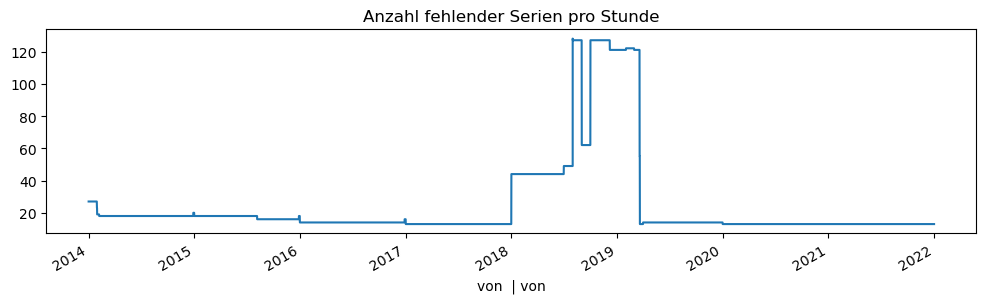

In [118]:
# Zeitlicher Verlauf aller Missing Entries
missing_over_time = df_filtered.isna().sum(axis=1)
missing_over_time.plot(figsize=(12,3), title="Anzahl fehlender Serien pro Stunde")

count      216.000000
mean      8092.939815
std      15311.483573
min          1.000000
25%       3817.000000
50%       4081.000000
75%       5566.000000
max      70128.000000
Name: gap_hours, dtype: float64


<Axes: >

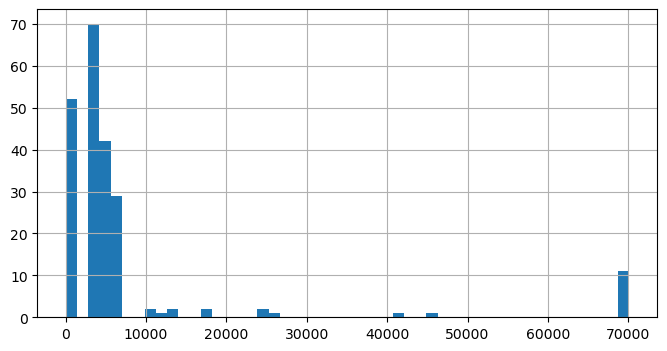

In [120]:
all_gaps = []
for col in df_filtered:
    lengths = gap_lengths(df_filtered[col])
    all_gaps += list(lengths[lengths>0])

# als DataFrame
gap_df = pd.Series(all_gaps, name="gap_hours")
print(gap_df.describe())
gap_df.hist(bins=50, figsize=(8,4))

In [122]:
missing_counts = df_filtered.isna().sum().sort_values(ascending=False)

# Serien mit mehr als z.B. 60 000 fehlenden Stunden
print(missing_counts[missing_counts > 60000])

MWh/h | FL_00352208.PLAN.MengeKW    70128
MWh/h | KN_00003629.PLAN.Menge      70128
MWh/h | KN_00003635.PLAN.Menge      70128
MWh/h | KN_00003645.PLAN.Menge      70128
MWh/h | KN_00003613.PLAN.Menge      70128
MWh/h | KN_00003602.PLAN.Menge      70128
MWh/h | KN_00003549.PLAN.Menge      70128
MWh/h | KN_00003424.PLAN.Menge      70128
MWh/h | KN_00003623.PLAN.Menge      70128
MWh/h | CV_00348857.PLAN.Menge      70128
MWh/h | KN_00003421.PLAN.Menge      70128
dtype: int64


In [123]:
# Gesamtzahl der Stunden im gefilterten Zeitraum
total_hours = df_filtered.shape[0]

# 10 % Missing-Werte erlauben
threshold_pct = 0.10
threshold_hours = int(total_hours * threshold_pct)

print(f"{total_hours=} Stunden, das entspricht {threshold_hours=} (≈10 %)")

total_hours=70128 Stunden, das entspricht threshold_hours=7012 (≈10 %)


In [124]:
good_series = missing_counts[missing_counts < threshold_hours].index
df_final = df_filtered[good_series]

In [126]:
missing_counts = df_final.isna().sum().sort_values(ascending=False)
missing_counts.head(10)

MWh/h | FL_00352230.PLAN.MengeHH    5566
MWh/h | FL_00352206.PLAN.MengeHH    5566
MWh/h | FL_00024607.PLAN.MengeHH    5566
MWh/h | FL_00025297.PLAN.MengeGA    5566
MWh/h | FL_00352218.PLAN.MengeKW    5566
MWh/h | FL_00352205.PLAN.MengeGA    5566
MWh/h | FL_00352251.PLAN.MengeHH    5566
MWh/h | FL_00025297.PLAN.MengeHH    5566
MWh/h | FL_00352205.PLAN.MengeHH    5566
MWh/h | FL_00025287.PLAN.MengeGA    5566
dtype: int64

In [127]:
def gap_lengths(s: pd.Series) -> pd.Series:
    """Längen aller zusammenhängenden NaN‑Blöcke in einer Serie."""
    # 1 = NaN, 0 = valid; gruppiere auf valid-Übergänge, summiere die 1er
    return s.isna().astype(int) \
            .groupby(s.notna().astype(int).cumsum()) \
            .sum()

# über alle Spalten hinweg sammeln
all_gaps = []
for col in df_final.columns:
    gl = gap_lengths(df_final[col])
    all_gaps += list(gl[gl > 0])

gap_df = pd.Series(all_gaps, name="gap_hours")

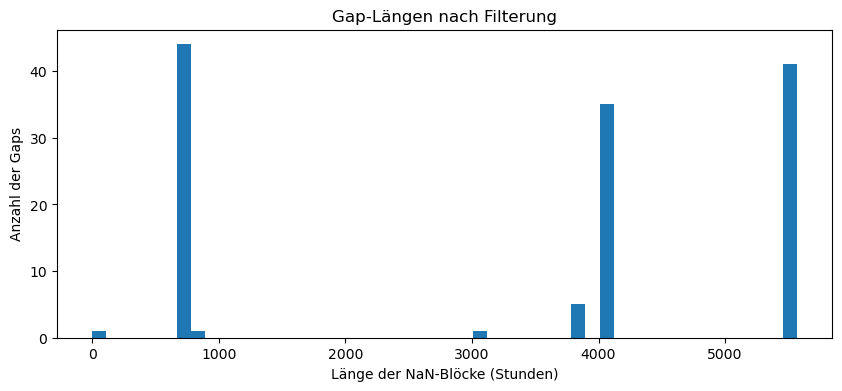

In [128]:
plt.figure(figsize=(10,4))
plt.hist(gap_df, bins=50)
plt.yscale('linear')
plt.xlabel('Länge der NaN‑Blöcke (Stunden)')
plt.ylabel('Anzahl der Gaps')
plt.title('Gap‑Längen nach Filterung')
plt.show()

In [129]:
# Häufigkeiten der einzelnen Gap-Längen (oder gerundet auf 100er-Schritte)
vc = gap_df.round(-2).value_counts().sort_index()
print(vc)

gap_hours
0        1
700     44
900      1
3100     1
3800     5
4100    35
5600    41
Name: count, dtype: int64


In [130]:
bins = [0, 24, 168, 720, 2160, 6000]  # Stunden: 1d, 1w, 1M, 3M, ~8M
labels = ['<24h', '1d–1w', '1w–1M', '1M–3M', '>3M']
gap_bins = pd.cut(gap_df, bins=bins, labels=labels)
print(gap_bins.value_counts())

gap_hours
>3M      82
1M–3M    36
1w–1M     9
<24h      1
1d–1w     0
Name: count, dtype: int64


In [133]:
gap_df

0      5566
1      5566
2      5566
3      5566
4      5566
       ... 
123     681
124     681
125     679
126       1
127     672
Name: gap_hours, Length: 128, dtype: int64

Gefundene Lücken zwischen 690 h und 750 h: 39


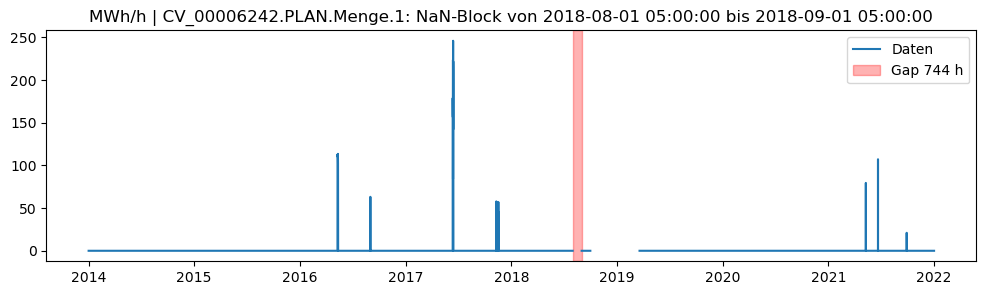

In [136]:
def find_gaps(df):
    """
    Durchläuft jede Spalte und liefert eine Liste von Dicts mit
    Serie, Startzeit, Endezeit und Länge jeder NaN-Lücke.
    """
    gaps = []
    for col in df.columns:
        is_nan = df[col].isna()
        # cumsum erzeugt Gruppen, die über gültige Daten neu zählen
        grp = is_nan.astype(int).groupby((~is_nan).cumsum())
        for group_id, block in grp:
            length = int(block.sum())
            if length > 0:
                # Start-Index ist der erste Index des Blocks
                # Ende-Index ist Start + Länge - 1
                start_pos = block.index[0]
                end_pos = block.index[-1]
                gaps.append({
                    "serie": col,
                    "start": start_pos,
                    "end": end_pos,
                    "length": length
                })
    return pd.DataFrame(gaps)

# 1. Alle Gaps extrahieren
gaps_df = find_gaps(df_final)

# 2. Beispiel: Lücken mit Länge genau 700 h
gaps_range  = gaps_df[(gaps_df["length"] >= 690) & (gaps_df["length"] <= 750)]
# Alternativ mit .between():
# gaps_range = gaps_df[gaps_df["length"].between(690, 750)]

print(f"Gefundene Lücken zwischen 690 h und 750 h: {len(gaps_range)}")

# 3. Erste Lücke aus diesem Bereich plotten
if not gaps_range.empty:
    gap = gaps_range.iloc[0]
    serie, start, end, length = gap[["serie","start","end","length"]]

    plt.figure(figsize=(12,3))
    plt.plot(df_final[serie], label="Daten")
    plt.axvspan(start, end, color="red", alpha=0.3,
                label=f"Gap {length} h")
    plt.title(f"{serie}: NaN-Block von {start} bis {end}")
    plt.legend()
    plt.show()
else:
    print("Keine Lücke im gewünschten Bereich gefunden.")

39 Serien mit 690–750 h Gaps: ['MWh/h | CV_00006242.PLAN.Menge.1' 'MWh/h | CV_00005785.PLAN.Menge'
 'MWh/h | CV_00003448.PLAN.Menge' 'MWh/h | CV_00003446.PLAN.Menge'
 'MWh/h | CV_00005849.PLAN.Menge' 'MWh/h | CV_00003453.PLAN.Menge'
 'MWh/h | FL_00025205.PLAN.MengeHH' 'MWh/h | FL_00024449.PLAN.MengeHH'
 'MWh/h | FL_00352230.PLAN.MengeGA' 'MWh/h | FL_00024607.PLAN.MengeKW'
 'MWh/h | FL_00025202.PLAN.MengeHH' 'MWh/h | FL_00025204.PLAN.MengeHH'
 'MWh/h | CV_00003454.PLAN.Menge' 'MWh/h | CV_00003438.PLAN.Menge'
 'MWh/h | CV_00006204.PLAN.Menge' 'MWh/h | CV_00005833.PLAN.Menge'
 'MWh/h | CV_00005825.PLAN.Menge' 'MWh/h | CV_00005818.PLAN.Menge'
 'MWh/h | CV_00005805.PLAN.Menge' 'MWh/h | CV_00005727.PLAN.Menge'
 'MWh/h | CV_00005798.PLAN.Menge' 'MWh/h | CV_00003474.PLAN.Menge'
 'MWh/h | CV_00001465.PLAN.Menge' 'MWh/h | CV_00005868.PLAN.Menge'
 'MWh/h | CV_00005878.PLAN.Menge' 'MWh/h | CV_00005891.PLAN.Menge'
 'MWh/h | CV_00005944.PLAN.Menge' 'MWh/h | CV_00005841.PLAN.Menge'
 'MWh/h | CV_00003

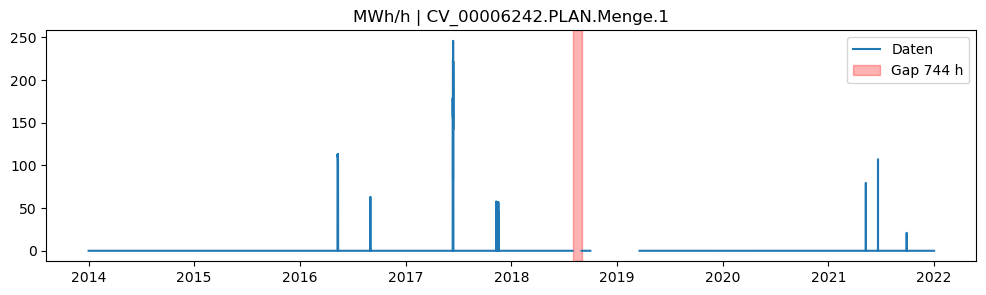

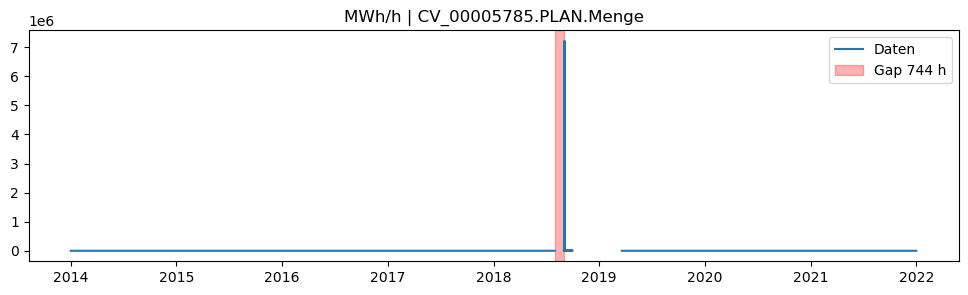

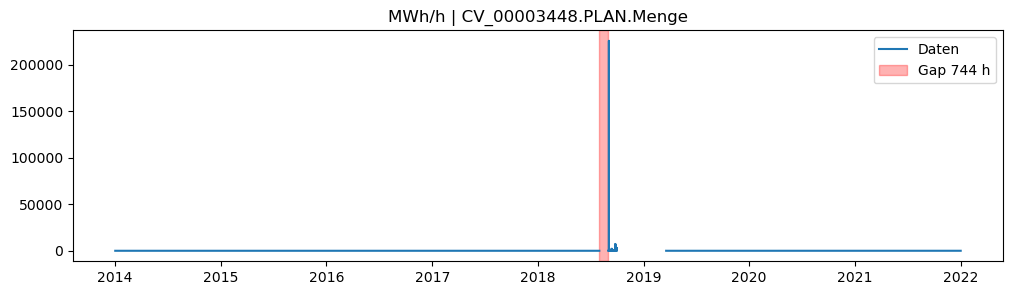

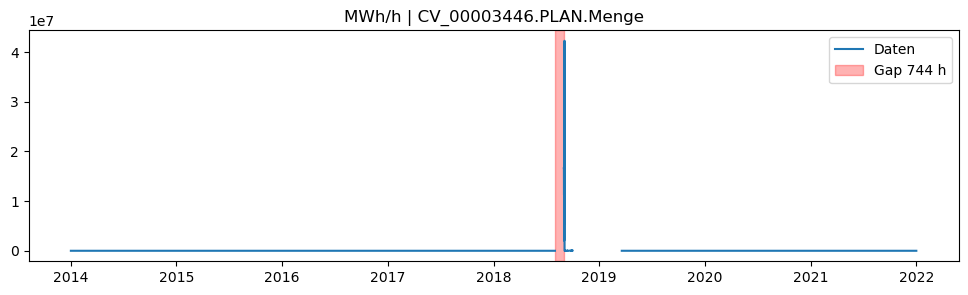

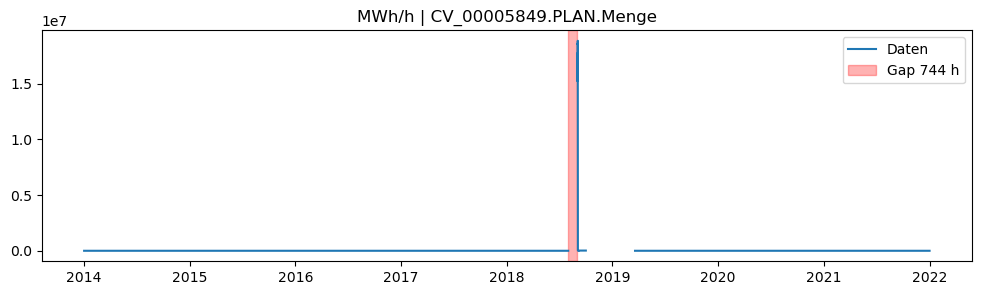

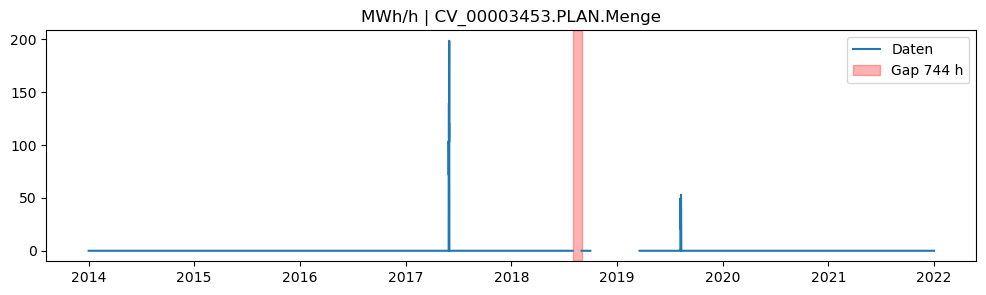

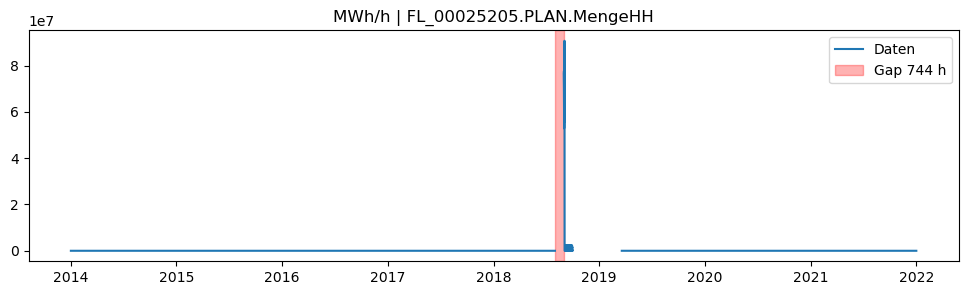

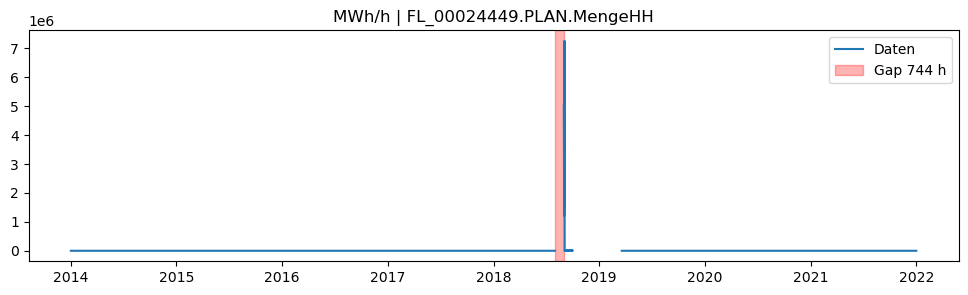

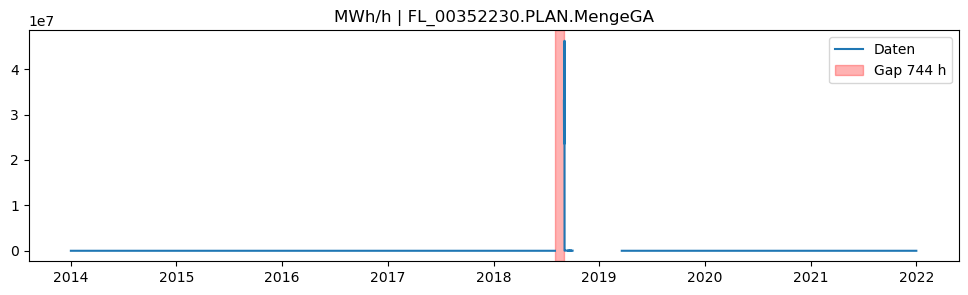

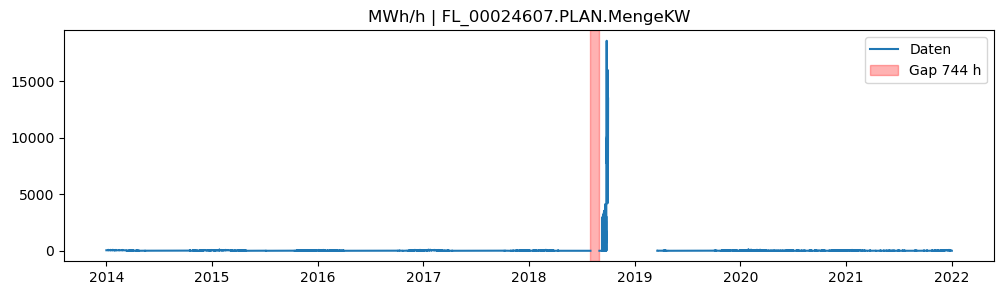

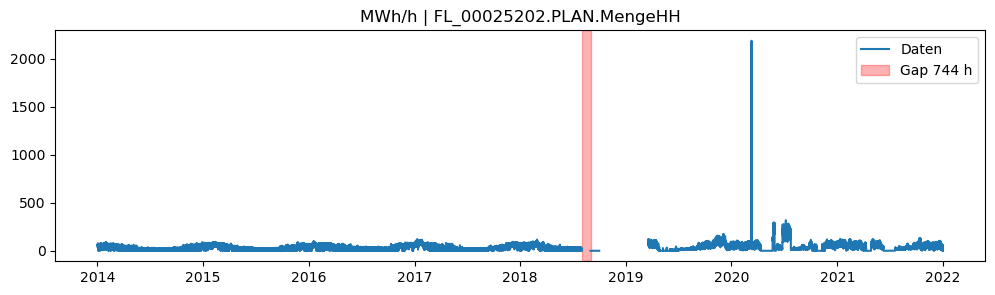

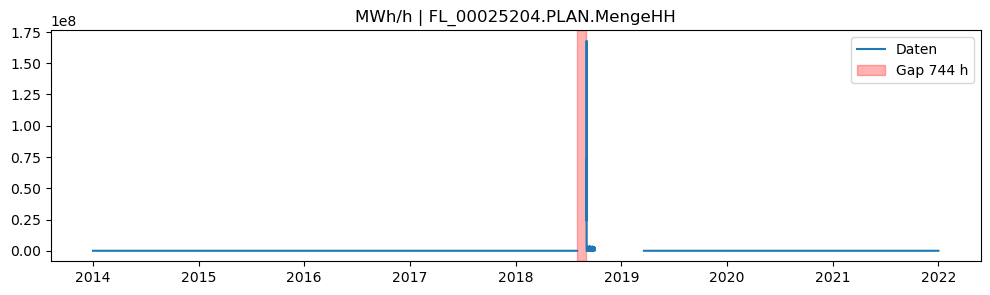

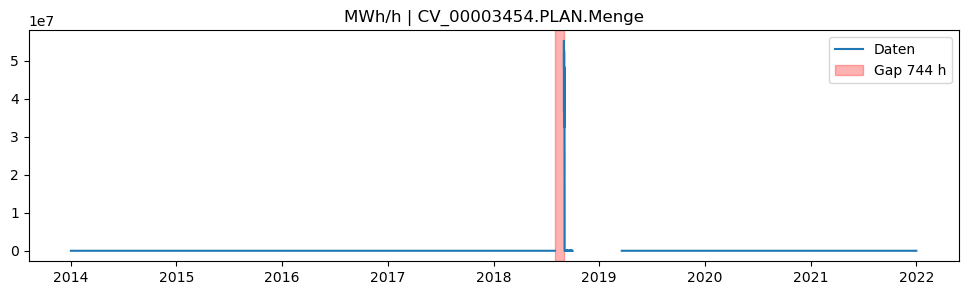

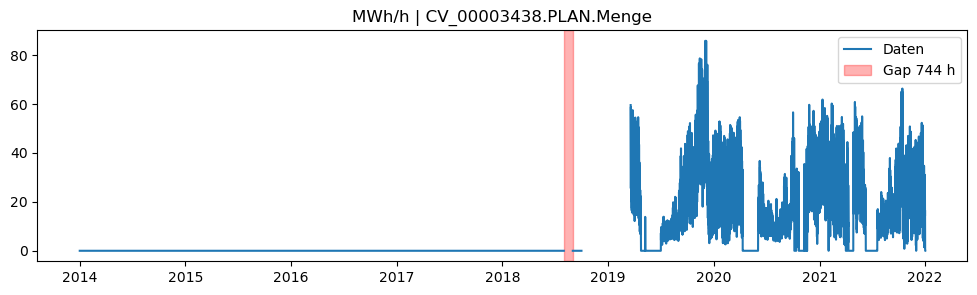

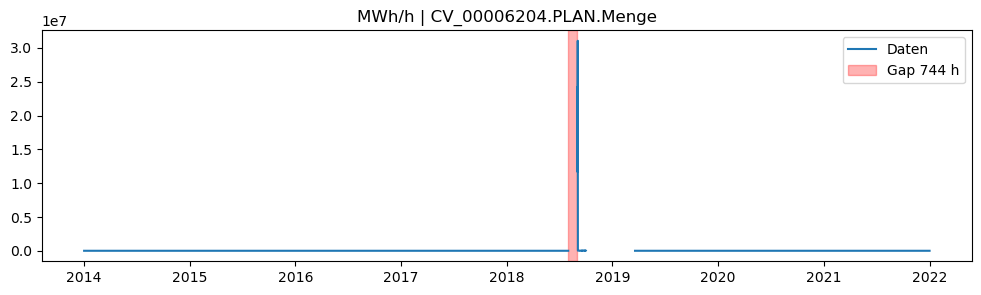

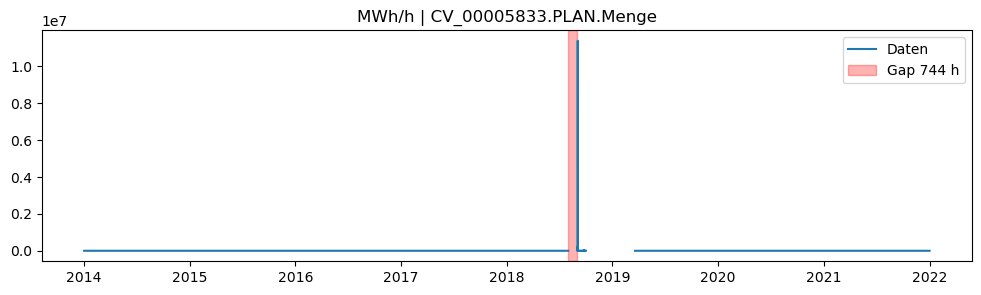

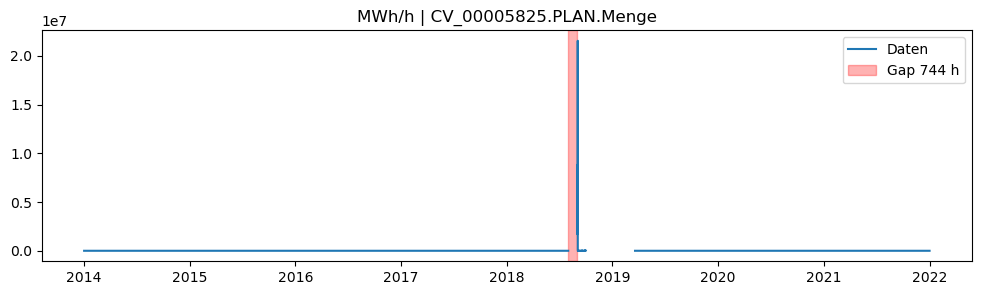

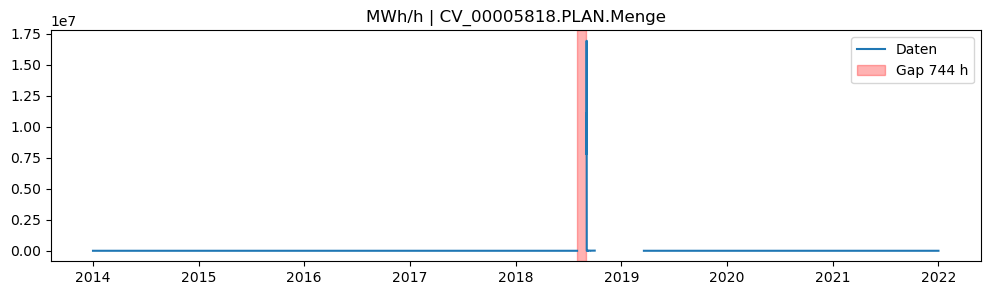

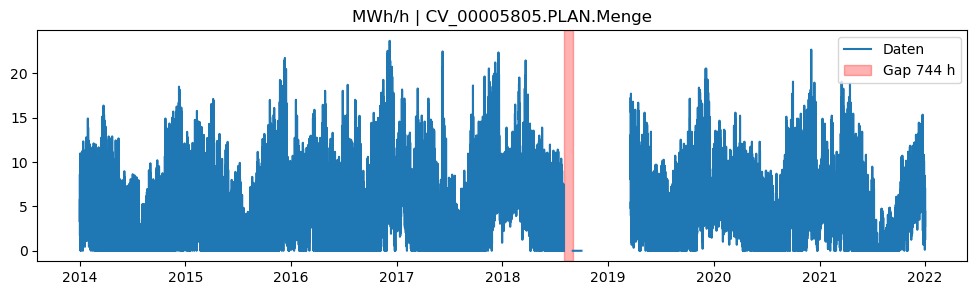

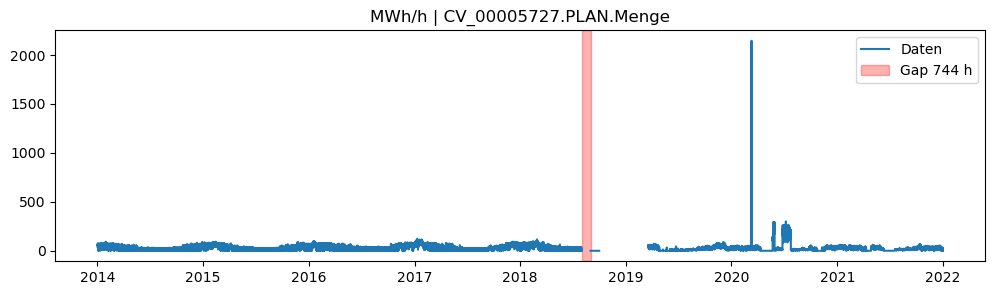

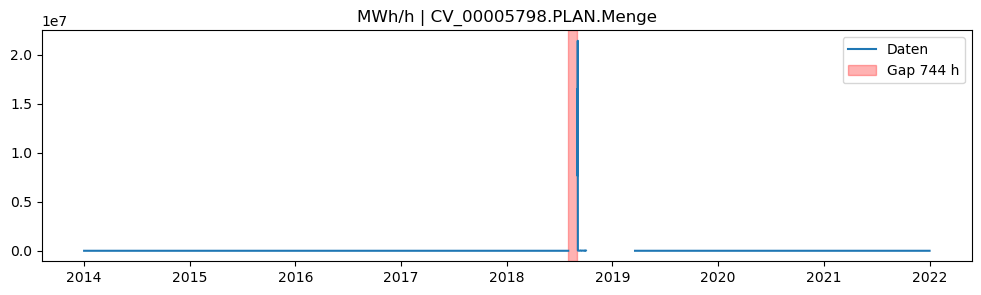

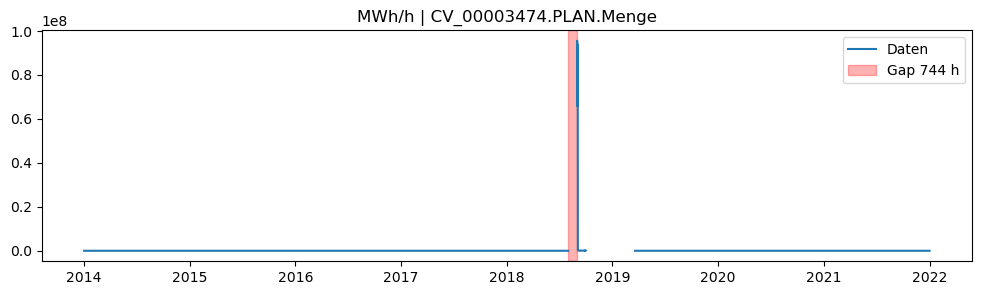

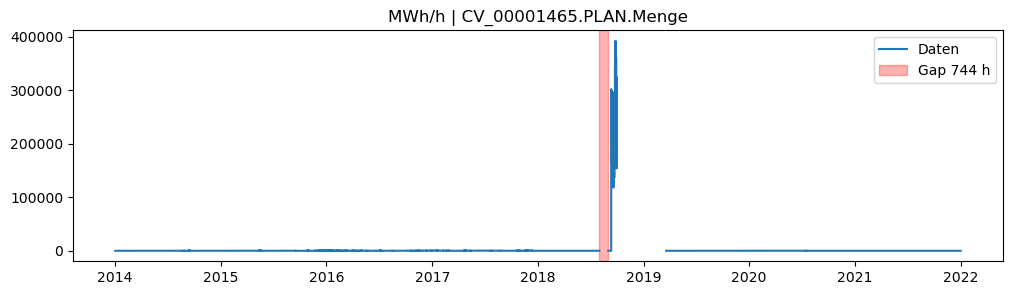

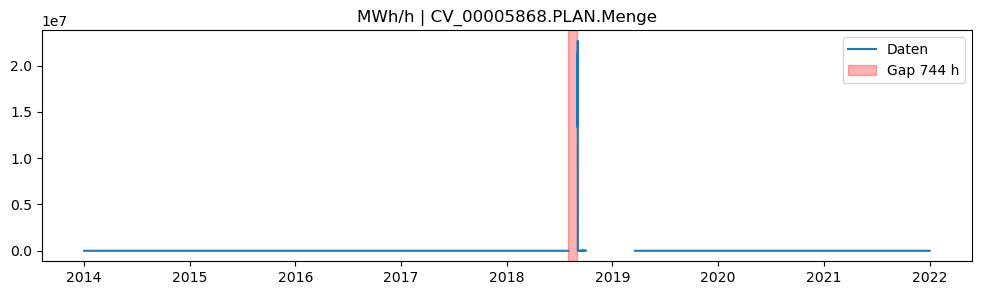

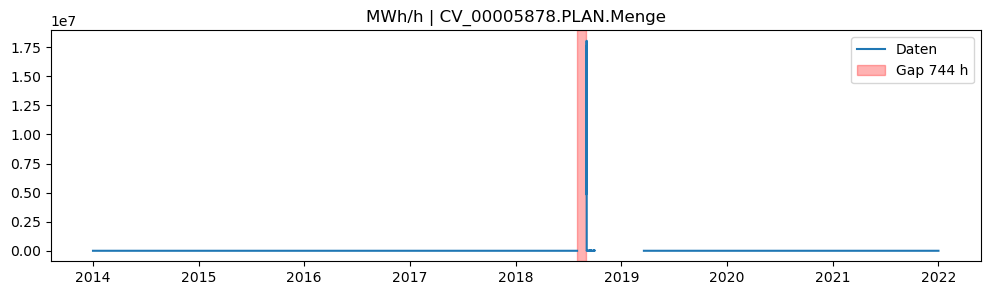

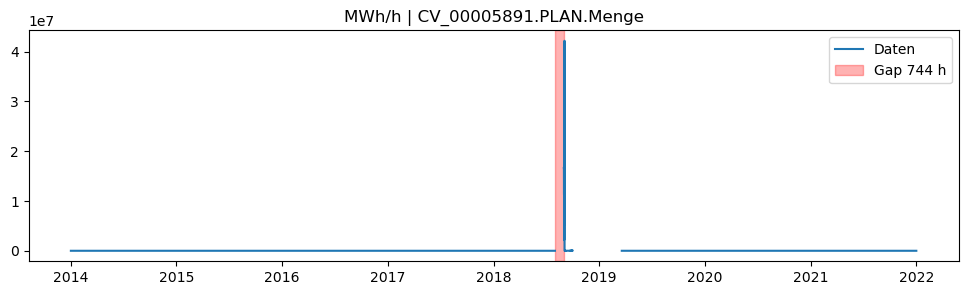

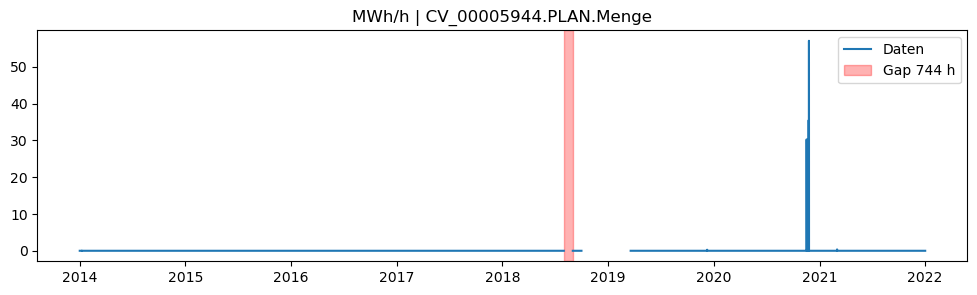

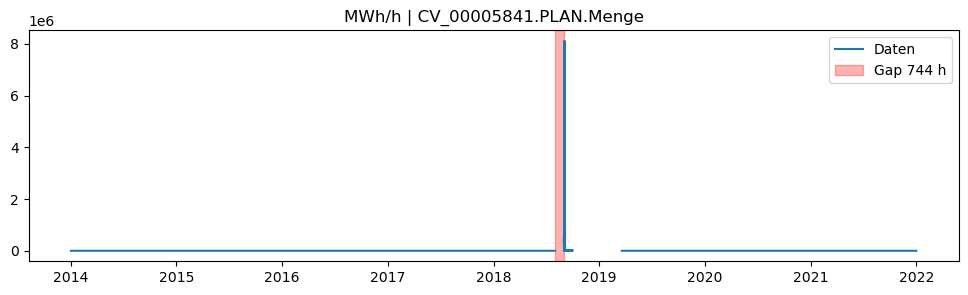

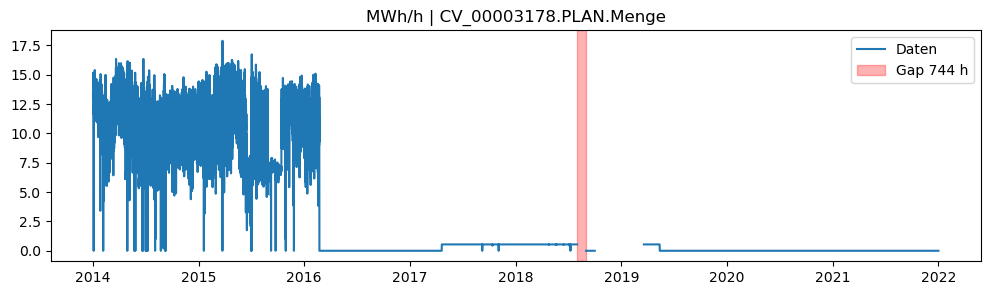

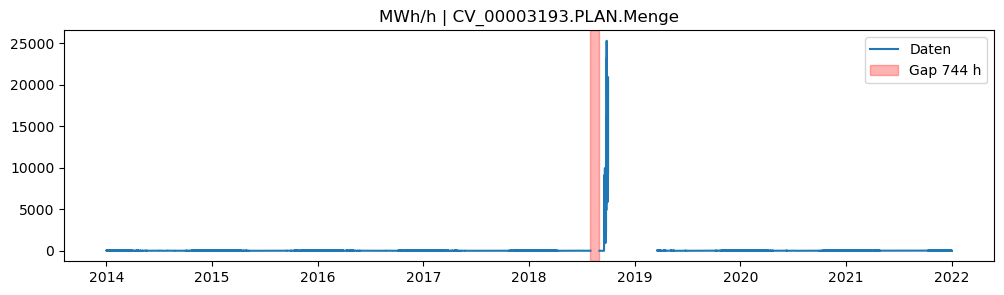

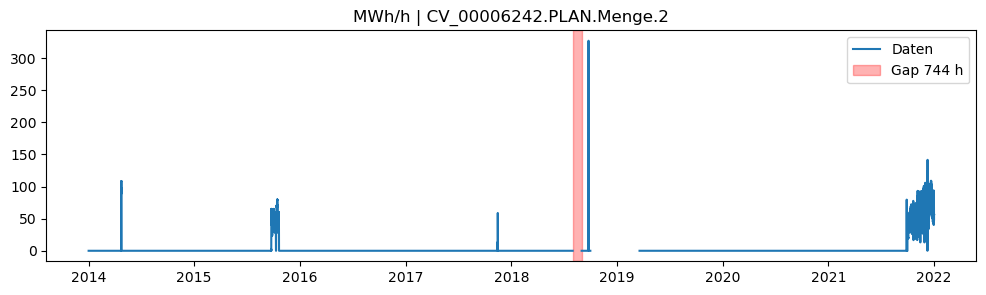

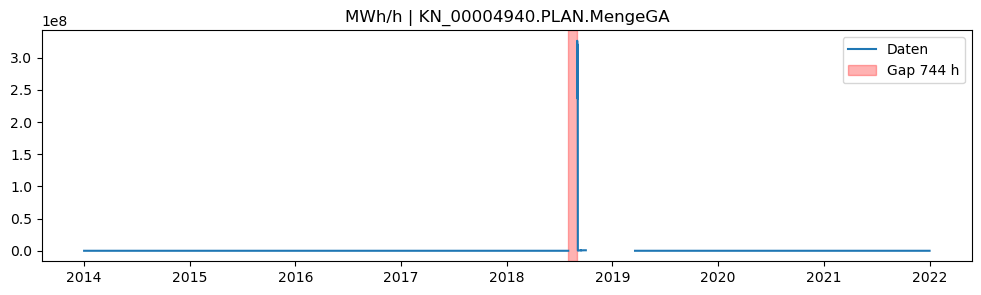

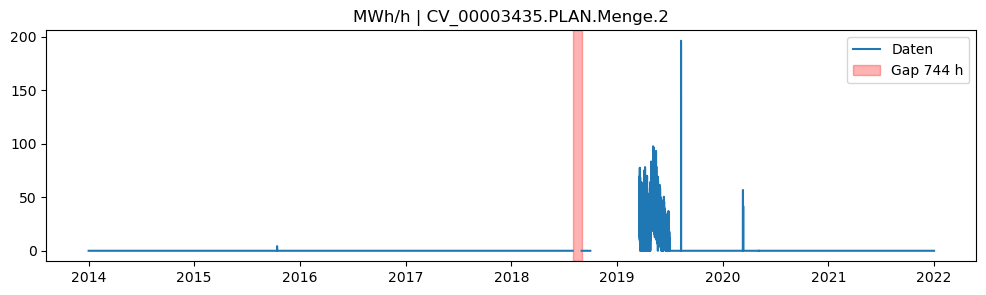

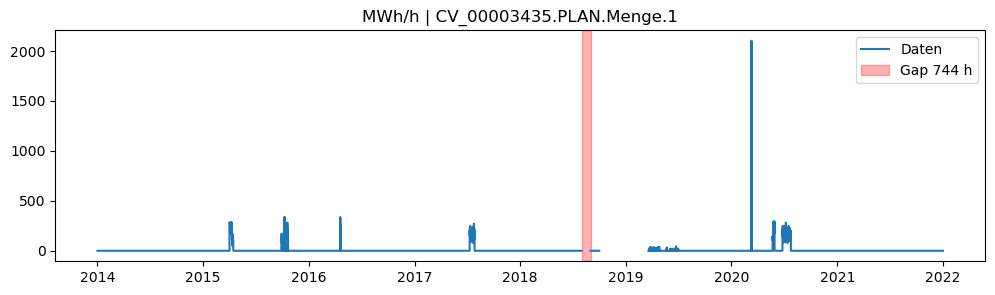

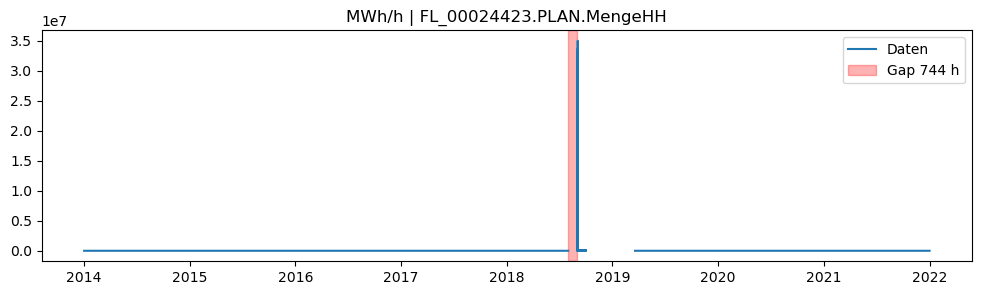

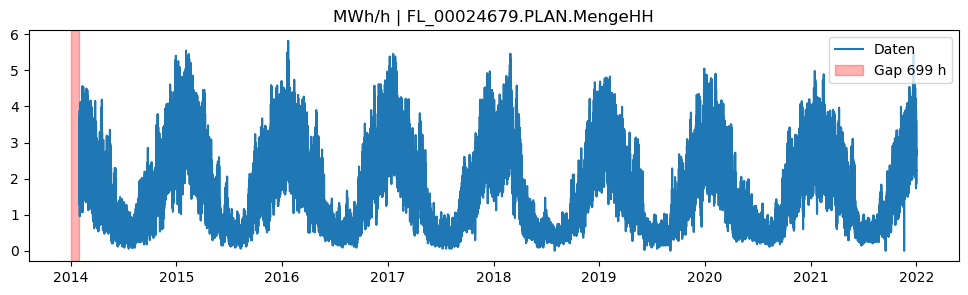

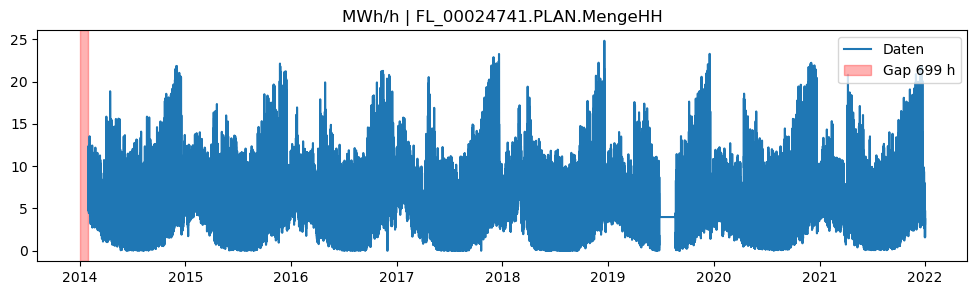

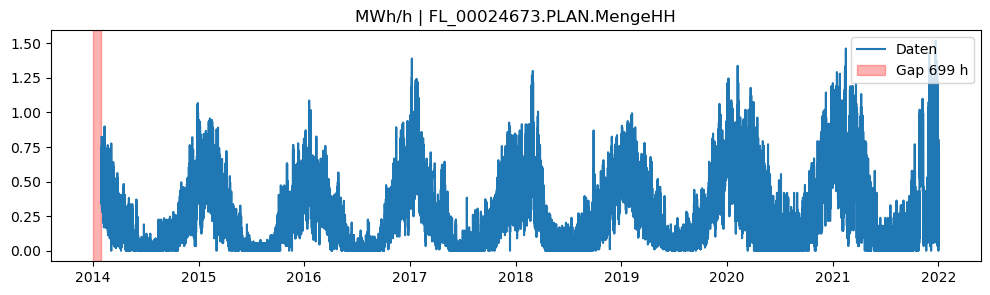

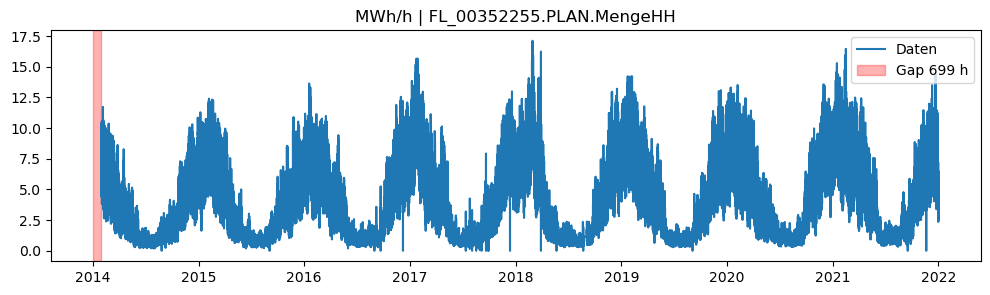

In [137]:

# 1. Gaps zwischen 690 und 750 h auswählen
gaps_range = gaps_df[gaps_df["length"].between(690, 750)]

# 2. Einzigartige Serien aus diesem Bereich
series_to_plot = gaps_range["serie"].unique()
print(f"{len(series_to_plot)} Serien mit 690–750 h Gaps:", series_to_plot)

# 3. Für jede Serie jeweils ALLE Lücken in diesem Bereich plotten
for serie in series_to_plot:
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(df_final[serie], label="Daten")

    # Alle Gaps dieser Serie herausfiltern
    for _, gap in gaps_range[gaps_range["serie"]==serie].iterrows():
        ax.axvspan(gap["start"], gap["end"],
                   color="red", alpha=0.3,
                   label=f"Gap {gap['length']} h")
    ax.set_title(f"{serie}")
    ax.legend(loc="upper right")
    plt.show()